**Table of contents**<a id='toc0_'></a>    
- [Seaborn и Matplotlib](#toc1_1_)    
- [Подробнее про графики Seaborn](#toc2_)    
  - [Гистограммы, KDE и плотности (распределения)](#toc2_1_)    
  - [Группы графиков](#toc2_2_)  
  - [Усиковые диаграммы](#toc2_3_)    
  - [Совместные распределения](#toc2_4_)    
  - [Столбцовые диаграммы](#toc2_5_)    
- [Заключение](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Seaborn - это очень мощный инструмент визуализации самых разных данных. 




## <a id='toc1_1_'></a>[Seaborn и Matplotlib](#toc0_)

Сравним отрисовку с помощью графиков Matplotlib и Seaborn

In [2]:
# импорт необходимых библиотек

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
# Генерируем случайные данные
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

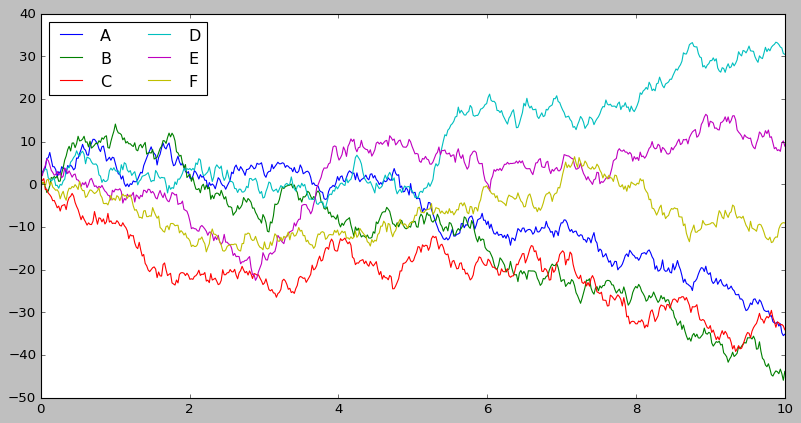

In [4]:
# рисуем с помощью Matplotlib
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Теперь давайте посмотрим, как это работает с Seaborn. 
Seaborn имеет свои собственные инструменты для построения графиков, но он
также может перезаписывать глобальные параметры отрисовки графиков, которые использует и Matplotlib.
Это позволяет даже простые графики Matplotlib сделать более красивыми. 
Мы можем установить стиль, вызвав метод set() Seaborn. 

По соглашению Seaborn импортируется как sns:

In [5]:
import seaborn as sns
sns.set()

Теперь давайте повторим те же две строки, что и раньше:

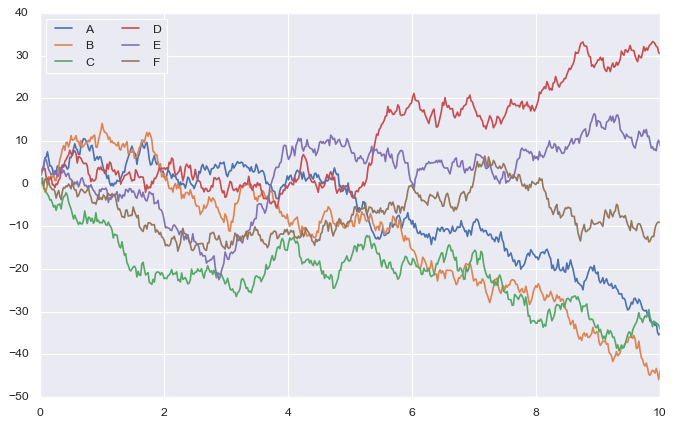

In [6]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Выглядит приятнее! А это все еще Matplotlib!

# <a id='toc2_'></a>[Подробнее про графики Seaborn](#toc0_)

## <a id='toc2_1_'></a>[Гистограммы, KDE и плотности (распределения)](#toc0_)

Гистограммы и совместные распределения переменных - одни из самых распространенных видов визуализации статистических данных.
В Matplotlib это относительно просто:

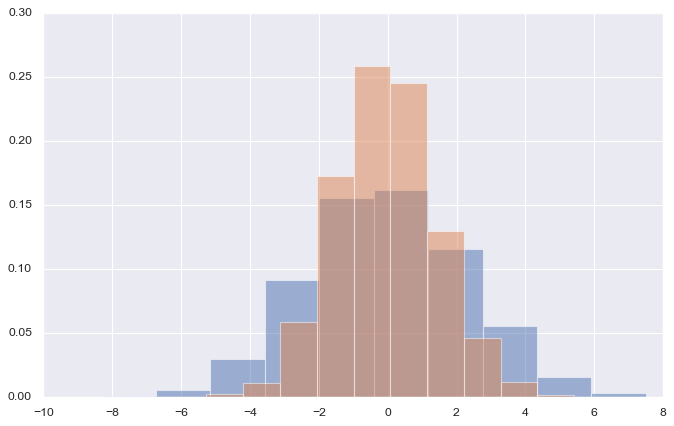

In [7]:
plt.figure(figsize=(10, 6), dpi=80)
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

В seaborn мы вместо гистограммы можем получить плавную оценку распределения с помощью sns.kdeplot, используя оценку плотности ядра:

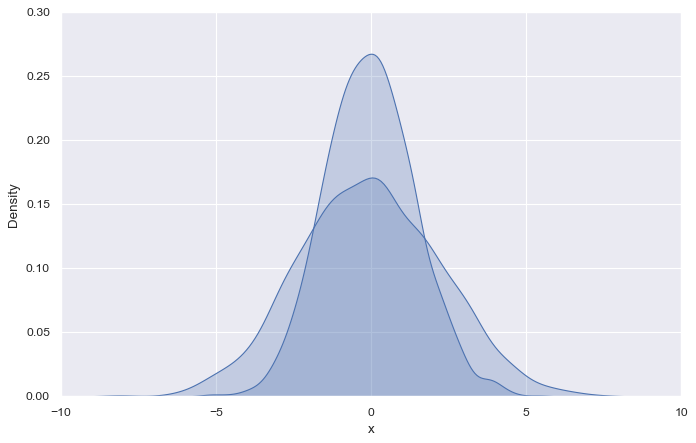

In [8]:
plt.figure(figsize=(10, 6), dpi=80)
for col in 'xy':
    sns.kdeplot(data[col], fill=True)

Гистограммы и KDE можно объединить на одном графике с помощью distplot:

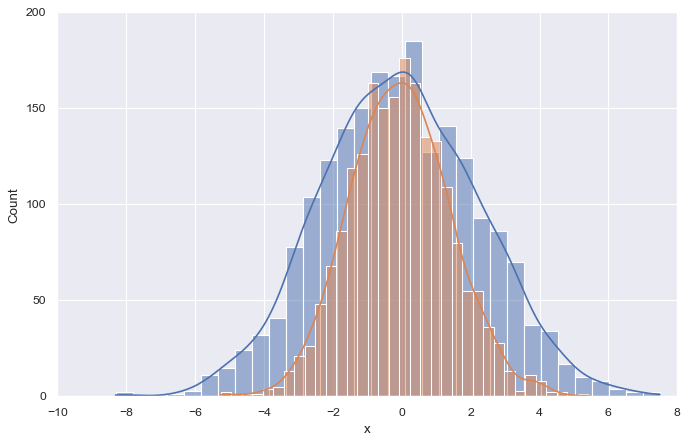

In [9]:
plt.figure(figsize=(10, 6), dpi=80)

sns.histplot(data['x'],  kde=True );
sns.histplot(data['y'], kde=True);

Мы можем отобразить распределения и совместный график используя sns.jointplot. 
Для этого графика мы установим фон - белый:

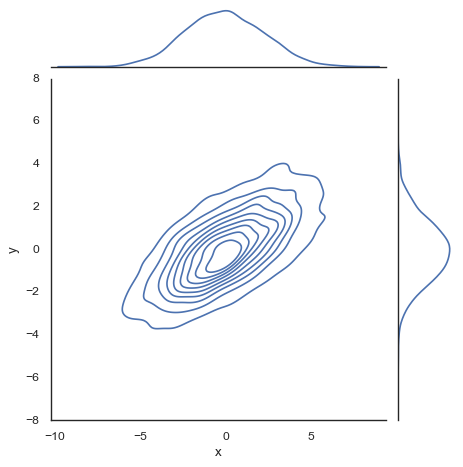

In [10]:
with sns.axes_style('white'):
    sns.jointplot(data, x="x", y="y",  kind='kde');

## <a id='toc2_2_'></a>[Группы графиков](#toc0_)

Когда вы обобщаете совместные графики на наборы данных большего размера, вы
получаете парные графики. Это очень полезно для изучения корреляций между
многомерными данными, когда вы хотите построить график всех пар значений друг
против друга.

In [11]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Для попарной визуализации используется функция sns.pairplot:

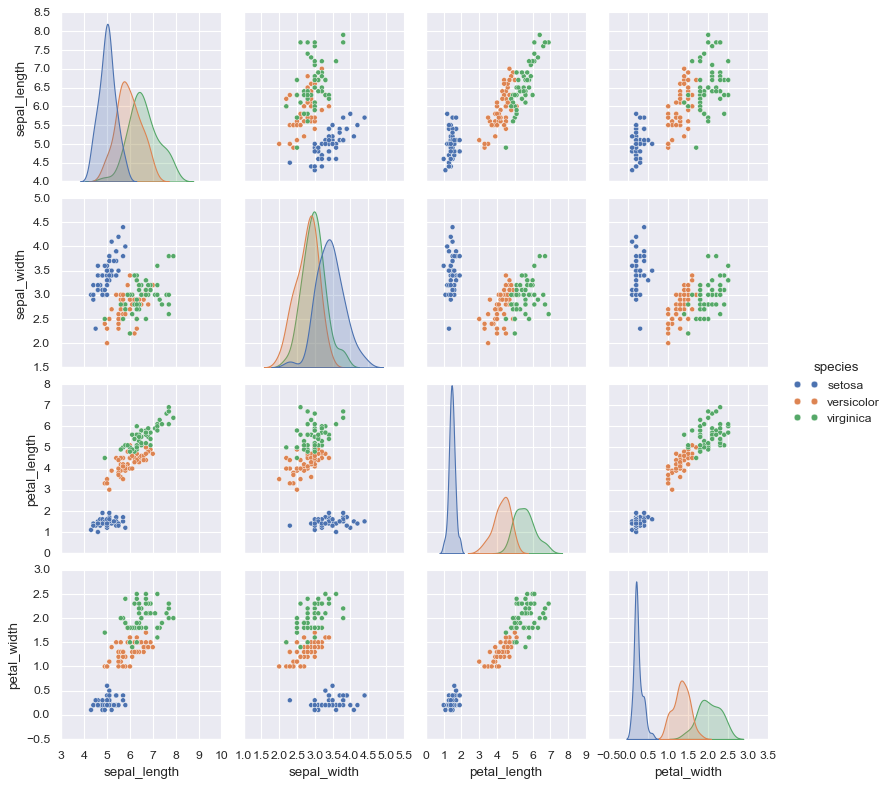

In [12]:
sns.pairplot(iris, hue='species', height=2.5);

# iris - название датафрейма
# hue - название категориального столбца, в соответствии с которым будем раскрашивать графики
# height - высота каждой строки

<a id='toc2_2_1_'></a>[FacetGrid](#toc0_)

Иногда лучший способ просмотра данных — это гистограммы подмножеств. FacetGrid
от Seaborn делает это чрезвычайно простым. Мы рассмотрим некоторые данные,
которые показывают сумму, которую персонал ресторана получает в виде чаевых, на
основе данных различных показателей:

In [13]:
# загружаем встроенный набор данных
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


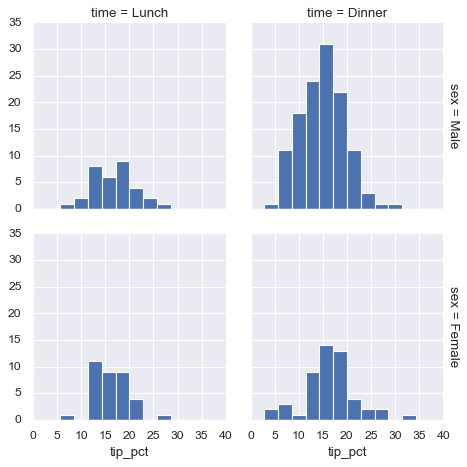

In [14]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

## <a id='toc2_3_'></a>[Усиковые диаграммы](#toc0_)

Усиковые диаграммы позволяют просматривать распределение данных внутри интервалов, определяемых другими данными:

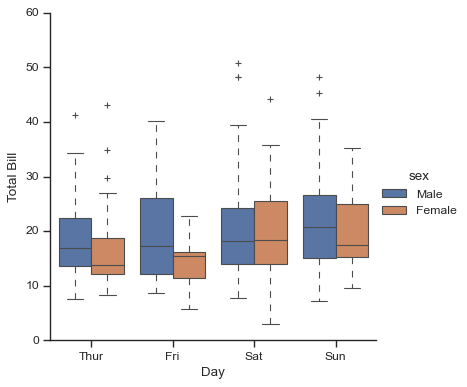

In [15]:
# простая усиковая диаграмма 

with sns.axes_style(style='ticks'):
    g = sns.catplot(tips, x = "day", y = "total_bill", hue="sex" , kind="box")
    g.set_axis_labels("Day", "Total Bill");

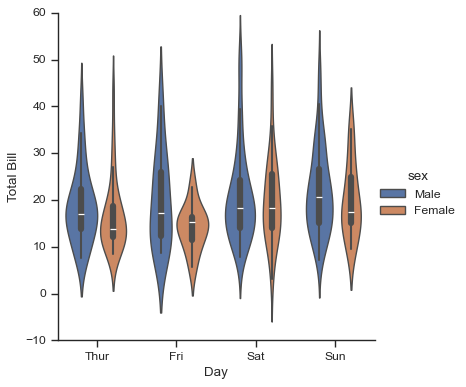

In [16]:
# скрипичная диаграмма 

with sns.axes_style(style='ticks'):
    g = sns.catplot(tips, x = "day", y = "total_bill", hue="sex" , kind="violin")
    g.set_axis_labels("Day", "Total Bill")

<Axes: xlabel='day', ylabel='total_bill'>

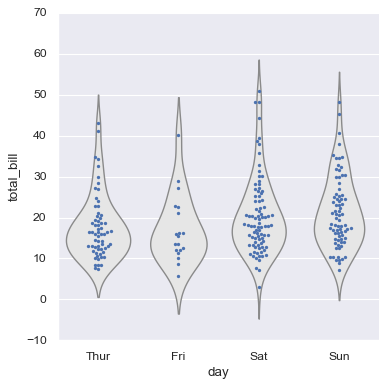

In [17]:
sns.catplot(data=tips, x="day", y="total_bill", kind="violin", color='.9', inner=None)
sns.swarmplot(data=tips, x="day", y="total_bill", size=3)

## <a id='toc2_4_'></a>[Совместные распределения](#toc0_)

Подобно парному графику, который мы видели ранее, мы можем использовать
sns.jointplot, чтобы показать совместное распределение между различными наборами
данных, а также связанные с ним маргинальные (частные) распределения:

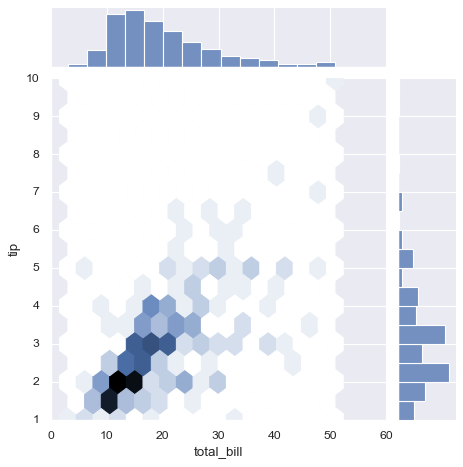

In [19]:
sns.jointplot(data=tips, x = "total_bill", y = "tip", kind='hex')

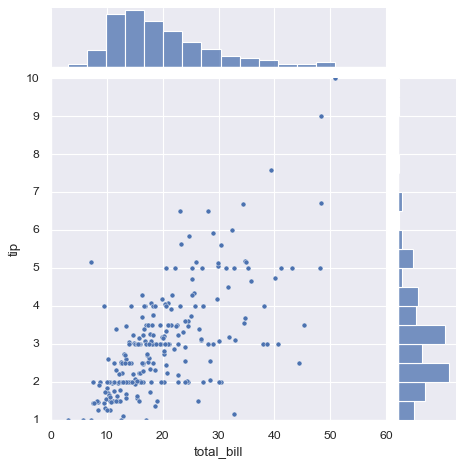

In [20]:
sns.jointplot(data=tips, x = "total_bill", y = "tip", kind='scatter')

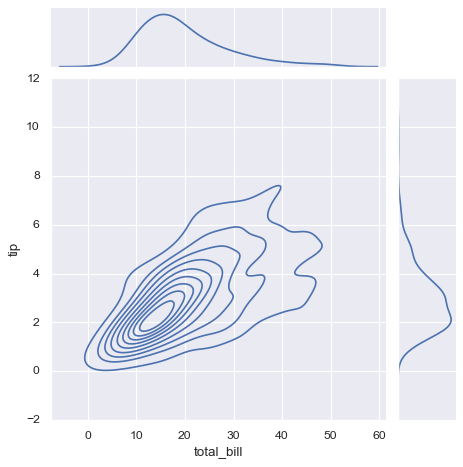

In [21]:
sns.jointplot(data=tips, x = "total_bill", y = "tip", kind='kde')

Совместный график может даже выполнять автоматическую оценку плотности ядра и регрессию:

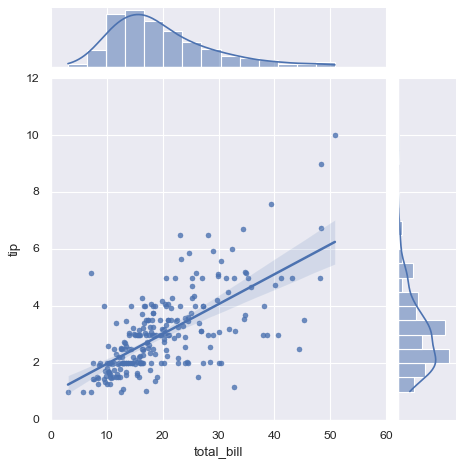

In [22]:
sns.jointplot(data=tips, x="total_bill", y="tip", kind='reg')

## <a id='toc2_5_'></a>[Столбцовые диаграммы](#toc0_)

Категориальные данные можно визуализировать с помощью столбцовых диаграмм. 
Например, sns.catplot (kind="count"). 
В следующем примере мы будем использовать набор данных «Планеты»:

In [23]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


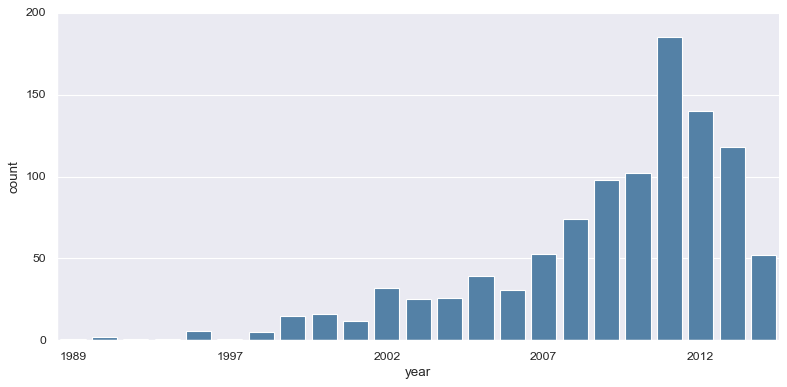

In [32]:
# отобразим, сколько в каком годы было открыто планет
g = sns.catplot(data=planets, x = "year",  aspect=2,
                       kind="count", color='steelblue')
g.set_xticklabels(step=5)

Ну и последний график, который мы рассмотрим, это визуализация сколько планет разыми способами было открыто в разные годы

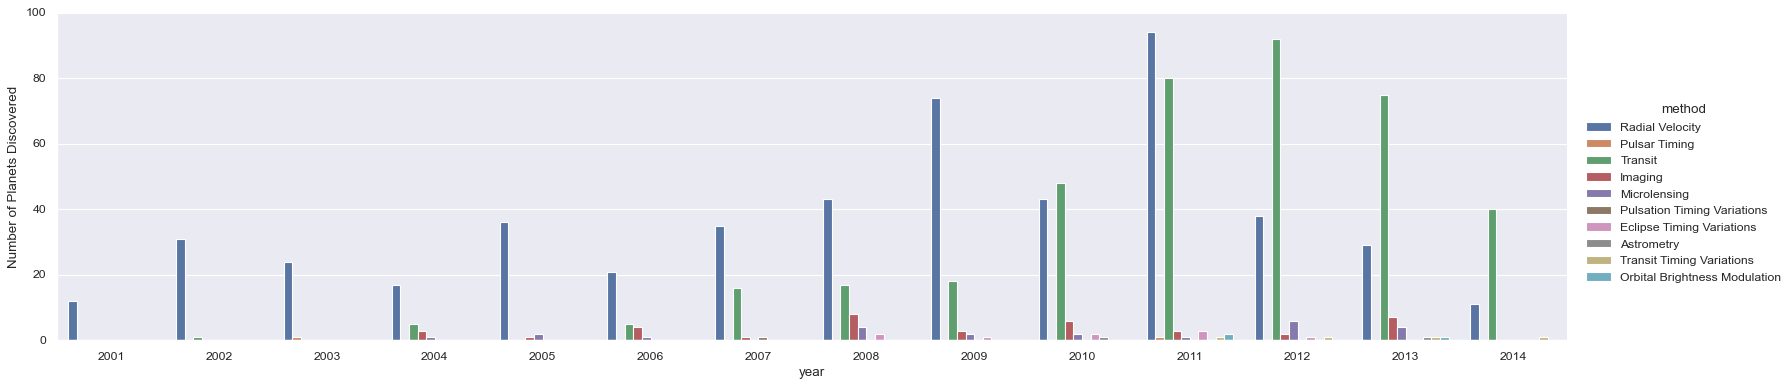

In [33]:
g = sns.catplot(data=planets, x="year", aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
g.set_ylabels('Number of Planets Discovered')

# <a id='toc3_'></a>[Заключение](#toc0_)

Seaborn - это невероятно мощный аппарат для визуализации данных. 
Более подробно про свойста Seaborn можно в документации по адресу:
https://seaborn.pydata.org/tutorial.html